In [17]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("D:/datasetGold.csv", index_col="Date", parse_dates=["Date"])

In [19]:
# use feature 'Date' & 'Close'
import matplotlib.dates as mdates
target_column = ["Close"]
dataset = pd.DataFrame(df[target_column])
print(' Count row of data: ',len(dataset))


 Count row of data:  1236


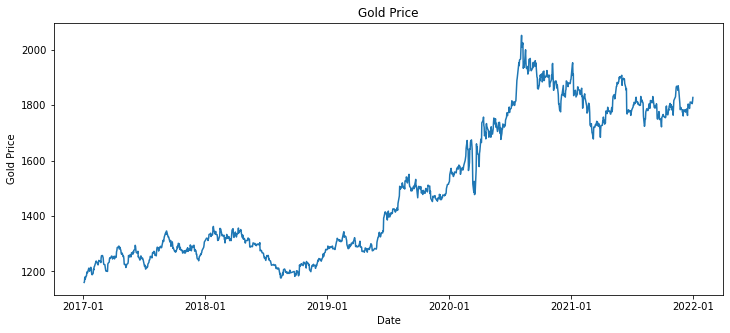

In [20]:
fig = plt.figure(figsize=(12, 5))
plt.plot(dataset)
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Gold Price')
plt.show()



In [21]:
#Data normalize
from sklearn.preprocessing import MinMaxScaler
dataset_norm = dataset.copy()
dataset[['Close']]
scaler = MinMaxScaler()
dataset_norm['Close'] = scaler.fit_transform(dataset[['Close']])
dataset_norm

,Close
Date,
2017-01-03,0.000000
2017-01-04,0.003816
2017-01-05,0.021659
2017-01-06,0.012905
2017-01-09,0.025923
...,...
2021-12-27,0.726854
2021-12-28,0.729211
2021-12-29,0.723488


In [22]:
#split data into train and test set
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.9)
totaldatatest = int(len(totaldata)*0.1)
training_set = dataset_norm[0:totaldatatrain]
test_set = dataset_norm[totaldatatrain:]


In [23]:
#Sliding windows
lag = 2


In [24]:
# sliding windows function
def create_sliding_windows(data,len_data,lag):
 x=[]
 y=[]
 for i in range(lag,len_data):
  x.append(data[i-lag:i,0])
  y.append(data[i,0]) 
 return np.array(x),np.array(y)


In [25]:
# Formating data into array for create sliding windows
array_training_set = np.array(training_set)
array_test_set = np.array(test_set)

In [26]:
# Create sliding windows into training data
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)

In [27]:
# Create sliding windows into test data
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set), lag)


In [28]:
#Apply train and test set into the model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, 
random_state=100)
model_rf.fit(x_train, y_train) 
pred_train_rf= model_rf.predict(x_train)
pred_test_rf = model_rf.predict(x_test)


In [29]:
set_test = dataset["Close"]
set_test

Date
2017-01-03    1160.4
2017-01-04    1163.8
2017-01-05    1179.7
2017-01-06    1171.9
2017-01-09    1183.5
               ...  
2021-12-27    1808.1
2021-12-28    1810.2
2021-12-29    1805.1
2021-12-30    1812.7
2021-12-31    1827.5
Name: Close, Length: 1236, dtype: float64

In [31]:
y_pred_invert_norm = scaler.inverse_transform(pred_test_rf.reshape(122, 1))

In [32]:
#Compare table
datacompare = pd.DataFrame()
datatest=np.array(set_test[totaldatatrain+lag:])
datapred= y_pred_invert_norm

In [33]:
datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare

,Data Test,Prediction Results
0,1809.4,1795.9782
1,1824.3,1801.8610
2,1828.4,1835.1166
3,1814.5,1834.6038
4,1808.7,1804.0022
...,...,...
117,1808.1,1808.9194
118,1810.2,1807.6366
119,1805.1,1807.8734
120,1812.7,1798.6114


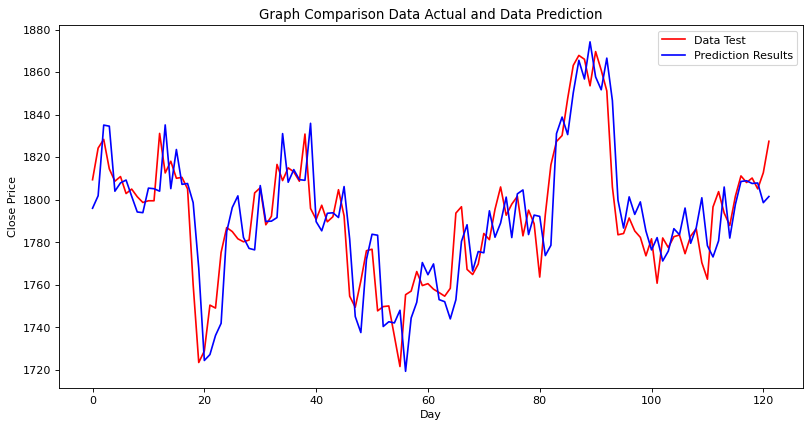

In [34]:
plt.figure(num=None, figsize=(12, 6), dpi=80,facecolor='w', 
edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], 
color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mse =  mean_squared_error((y_test), pred_test_rf)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error((y_test), pred_test_rf)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  0.018797068684327838
MAPE:  2.058789628801543
